In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
rand = np.random.RandomState(42)
x = rand.uniform(-5, 5, size=100)
y = (rand.normal(size=len(x)) + (np.sin(4 * x) + x))/2

In [3]:
x = x.reshape(-1, 1)

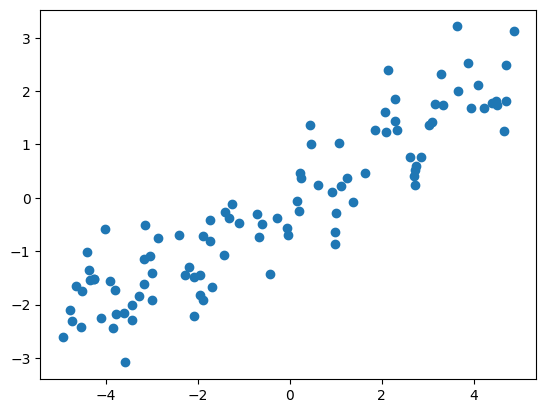

In [4]:
plt.plot(x, y, 'o')
plt.show()

In [5]:
x_test = np.linspace(-5, 5, endpoint=True).reshape(-1, 1)

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
model01 = LinearRegression().fit(x, y)
predict_model01 = model01.predict(x_test)

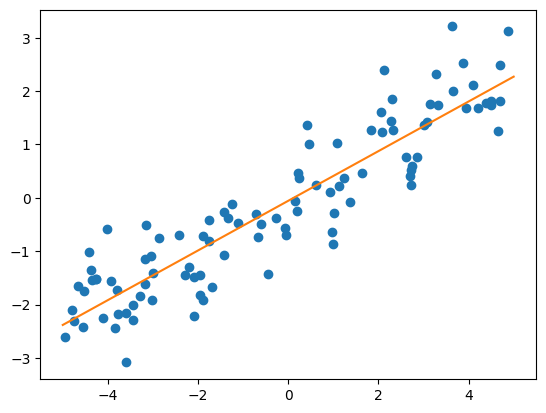

In [8]:
plt.plot(x, y, 'o')
plt.plot(x_test, predict_model01)

특성 공학 (Feature Engineering)

-> 데이터를 어떻게 변화시켜야 좋은 결과를 얻을 수 있을까?

- 특성 선택

- 특성 추출

In [9]:
# 균일한 구간으로 잘라서 구간 별 예측하자.
from sklearn.preprocessing import KBinsDiscretizer

In [10]:
bins = KBinsDiscretizer(n_bins=10, strategy="uniform", 
                        encode="onehot-dense").fit(x)
x_binned = bins.transform(x)

C:\Users\student\anaconda3\envs\dsde04\lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [11]:
model02 = LinearRegression().fit(x_binned, y)
predict_model02 = model02.predict(bins.transform(x_test))

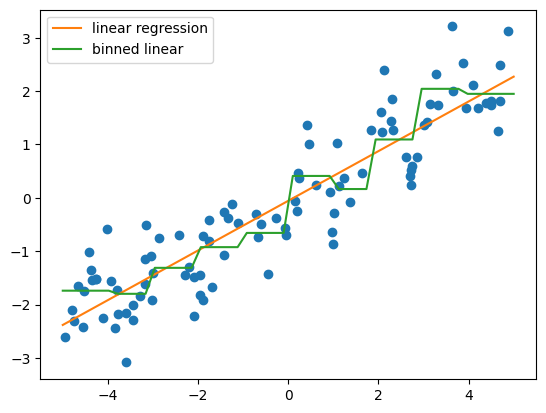

In [13]:
plt.plot(x, y, 'o')
plt.plot(x_test, predict_model01, label="linear regression")
plt.plot(x_test, predict_model02, label="binned linear")
plt.legend()

In [14]:
# 특성의 다항식 추가
from sklearn.preprocessing import PolynomialFeatures

In [36]:
poly = PolynomialFeatures(degree=10)
poly.fit(x)
x_poly = poly.transform(x)

In [37]:
x_poly.shape

(100, 11)

In [38]:
x_poly[0]

array([ 1.        , -1.25459881,  1.57401818, -1.97476134,  2.47753322,
       -3.10831024,  3.89968233, -4.89253682,  6.13817088, -7.70094189,
        9.66159254])

In [39]:
poly.get_feature_names_out()

array(['1', 'x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8',
       'x0^9', 'x0^10'], dtype=object)

In [40]:
model03 = LinearRegression().fit(x_poly, y)
predict_model03 = model03.predict(poly.transform(x_test))

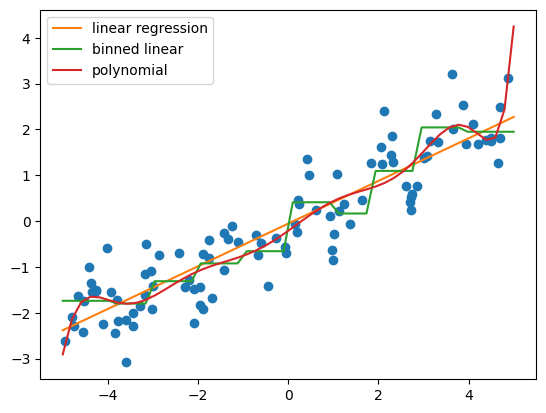

In [41]:
plt.plot(x, y, 'o')
plt.plot(x_test, predict_model01, label="linear regression")
plt.plot(x_test, predict_model02, label="binned linear")
plt.plot(x_test, predict_model03, label="polynomial")
plt.legend()

In [42]:
import seaborn as sns

In [43]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [44]:
# 1. 데이터 준비
x = tips[["total_bill", "size"]]
y = tips[["tip"]]

In [46]:
# 2. 데이터 분할
from sklearn.model_selection import train_test_split

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.3,
                                                   random_state=1)

In [48]:
# 3. 모델 선택
from sklearn.linear_model import LinearRegression

In [49]:
model = LinearRegression()

In [50]:
# 4. 학습
model.fit(x_train, y_train)

LinearRegression()

In [51]:
# 5. 평가
model.score(x_test, y_test)

0.44512449310324853

In [52]:
# 6. 예측
predict = model.predict(x_test)
predict

array([[1.22853705],
       [2.78947146],
       [3.64567935],
       [2.38626084],
       [3.00178148],
       [1.80463844],
       [2.11685906],
       [3.13809784],
       [2.40588614],
       [3.62677747],
       [2.19892848],
       [2.01427228],
       [4.10313692],
       [3.36306533],
       [5.80624599],
       [3.13648237],
       [3.19535826],
       [2.03211346],
       [2.2462076 ],
       [3.53880093],
       [4.12187016],
       [2.70026557],
       [2.57002498],
       [3.50010511],
       [2.22301407],
       [2.06422758],
       [2.94201353],
       [3.36930974],
       [2.94095283],
       [3.95522379],
       [2.27386142],
       [4.14506369],
       [2.09723376],
       [4.46994177],
       [4.54024578],
       [2.3113279 ],
       [4.06316292],
       [3.07013272],
       [2.7875187 ],
       [2.11061465],
       [3.58128247],
       [3.11579637],
       [3.12042531],
       [2.45316526],
       [3.2788745 ],
       [3.69847947],
       [3.41998845],
       [4.578

In [53]:
x

,total_bill,size
0,16.99,2
1,10.34,3
2,21.01,3
3,23.68,2
4,24.59,4
...,...,...
239,29.03,3
240,27.18,2
241,22.67,2
242,17.82,2


In [54]:
y

,tip
0,1.01
1,1.66
2,3.50
3,3.31
4,3.61
...,...
239,5.92
240,2.00
241,2.00
242,1.75


In [55]:
# w
model.coef_

array([[0.08920589, 0.1595099 ]])

In [56]:
# b
model.intercept_

array([0.79516507])

In [57]:
# 1. 데이터 준비
x = tips[["total_bill", "size"]]
y = tips[["tip"]]

In [58]:
poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(x)

In [59]:
poly.get_feature_names_out()

array(['1', 'total_bill', 'size', 'total_bill^2', 'total_bill size',
       'size^2', 'total_bill^3', 'total_bill^2 size', 'total_bill size^2',
       'size^3'], dtype=object)

In [60]:
x_poly[0]

array([1.0000000e+00, 1.6990000e+01, 2.0000000e+00, 2.8866010e+02,
       3.3980000e+01, 4.0000000e+00, 4.9043351e+03, 5.7732020e+02,
       6.7960000e+01, 8.0000000e+00])

In [64]:
# 2. 분할
x_train, x_test, y_train, y_test = train_test_split(x_poly, y,
                                                   test_size=0.3,
                                                   random_state=1)

In [65]:
# 3, 4
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [66]:
model.score(x_test, y_test)

0.3741141866500213